# Types of Analysis

In [1]:
# Basis Imports

import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
telco_base_data = pd.read_csv('../Data/Churn_Modelling.csv')
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariant Anaylsis

In [3]:
# Experimenting on some Features

telco_new = telco_base_data[['Geography', 'Gender', 'Exited']]
telco_new.head()

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [20]:
len(telco_new)

10000

In [4]:
# Churn-customer
telco_new['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
# 0 - Show's the acitive customers
# 1 - Show's the customer that are left (churn)

telco_new['Exited'].value_counts()/len(telco_new)*100

Exited
0    79.63
1    20.37
Name: count, dtype: float64

## Univariate Analysis

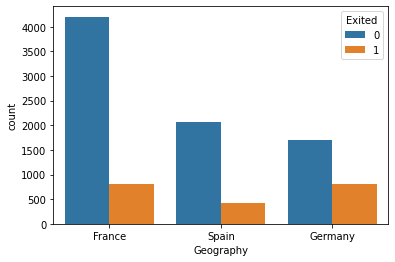

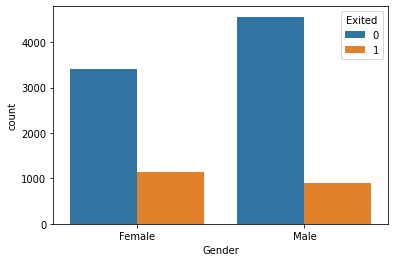

In [19]:
for i, predictor in enumerate(telco_new.drop(columns=['Exited'])):
  plt.figure()
  sns.countplot(data=telco_new, x=predictor, hue='Exited')

### Observation:

    - People staying in germany are more likely to churn
    - Female are more churner's
    
#### Calculation of Churn rate:
- (Exited / Not-Exited) * 100

       - Germany: 47%
       - Spain: 13%
       - France: 15%

## Bivariant Analysis

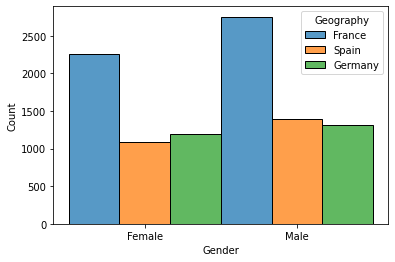

In [6]:
sns.histplot(x='Gender', hue='Geography', data=telco_new, stat="count", multiple="dodge");

In [7]:
telco_new_target_1 = telco_new.loc[telco_new['Exited'] == 1] 

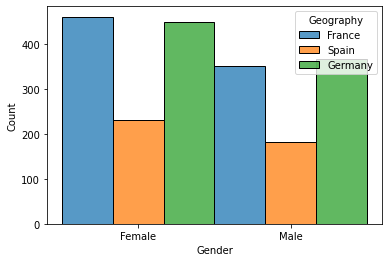

In [8]:
sns.histplot(x='Gender', hue='Geography', data=telco_new_target_1, stat="count", multiple="dodge");

<hr>
## Numerical Analysis

**Correlation:** It ranges from -1 to +1

- +1 --> Positive Correlation
- -1 --> Negative Correlation
- ~0 --> No Correlation

<hr>

In [9]:
telco_base_data.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

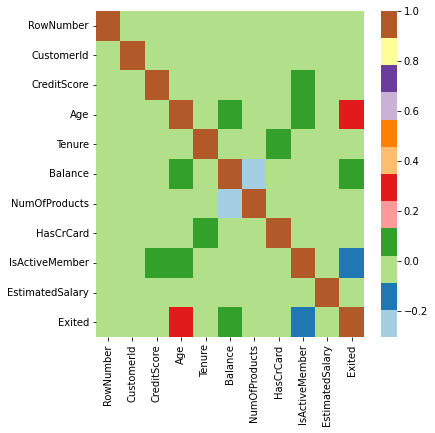

In [10]:
plt.figure(figsize=(6, 6))
sns.heatmap(telco_base_data.corr(numeric_only=True), cmap='Paired')

<hr>

### Observation: 
    - With respected to 'Age' most people exited.
    - So age is our most important column
<hr>

In [11]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<br>

- Plotting ['Age'] graph by using line-chart because in our value range from 20 - 90 out histogram will look clumsy



In [12]:
telco_base_data['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

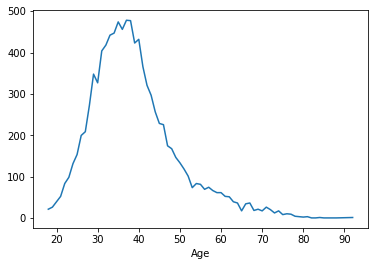

In [13]:
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot();

In [14]:
# Checking for exited customers

telco_base_data_1 = telco_base_data.loc[telco_base_data["Exited"]==1]

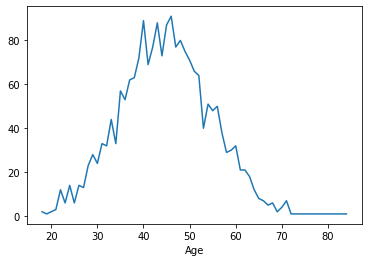

In [15]:

telco_base_data_1['Age'].value_counts().sort_index(ascending=True).plot();

### Obseration:
    - People who are churning are around 35-50
    - So age is an important factor

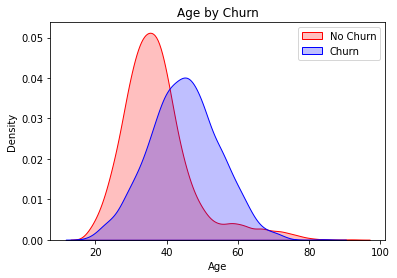

In [16]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
                 color="red", fill=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
                 color="blue", fill=True)

Tot.legend(["No Churn", "Churn"])
Tot.set_ylabel("Density")
Tot.set_xlabel("Age")
Tot.set_title("Age by Churn");

Text(0.5, 1.0, 'Tenure by churn')

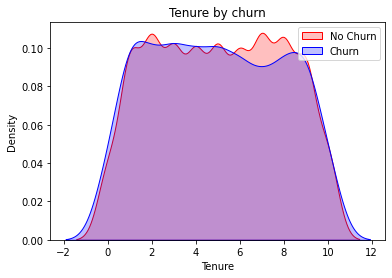

In [17]:
# Checking for Tenure

Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==0)],
                  color="Red", fill=True)
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==1)],
                  color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

Text(0.5, 1.0, 'Balance by churn')

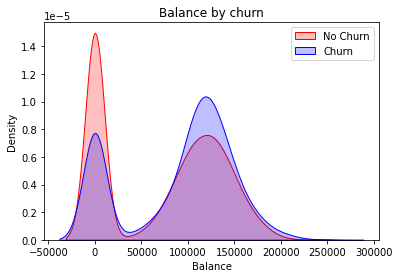

In [18]:
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
                  color="Red", fill=True)
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],
                  color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')
     